# SQL
## DATA CONTROL LANGUAGE - DCL

DCL é o conjunto de instruções usadas para gerenciar permissões de segurança aplicadas à usuários e objetos.

### GRANT

Após a criação de um usuário, é possível conceder conceder permissões de acesso aos usuários para objetos do banco de dados, como tabelas, views, procedimentos armazenados, etc.

#### MySQL via terminal

- CRIAR USUÁRIO 

In [ ]:
CREATE USER 'robson'@'localhost' IDENTIFIED BY '123456'

- Concederos privilégios SELECT, INSERT, UPDATE, DELETE ao usuário, apenas a tabela actor do banco de dados sakila

In [ ]:
GRANT SELECT, INSERT, UPDATE, DELETE ON sakila.actor TO 'robson'@'localhost';

- Conceder todos os privilégios ao usuário para todas as tabelas do banco de dados sakila

In [ ]:
GRANT ALL PRIVILEGES ON sakila.* TO 'robson'@'localhost';


- Aplicar as Mudanças

In [ ]:
FLUSH PRIVILEGES;


- Verificar Privilégios de um usuário

In [ ]:
SHOW GRANTS FOR 'robson'@'localhost';


#### Oracle Database via terminal

In [ ]:
-- logar no SQL*PLUS
sys as sysdba

-- Criar usuário
CREATE USER C##test_usr IDENTIFIED BY 123456;

Em um ambiente CDB, usuários comuns (que podem acessar todos os PDBs -  pluggable databases) precisam ter um prefixo C## em seus nomes, e usuários locais (que podem acessar apenas um PDB específico) não podem ser criados no root container (CDB$ROOT).

No Oracle, não é possível atribuir provilégios usando o caractere curinga `*`, usado noMySQL para selecionadas todas as tabelas de uma banco de dados. Para isso temos que usar um bloco PL/SQL para conceder privilégios em várias tabelas.

In [ ]:
BEGIN
  FOR t IN (SELECT table_name FROM all_tables WHERE owner = 'northwind') LOOP
    EXECUTE IMMEDIATE 'GRANT SELECT ON northwind.' || t.table_name || ' TO test_usr';
  END LOOP;
END;
/


É possível atribuir privilégios a grupo de usuários, bastando criar uma função com o nome do grupo. O exemplor a seguir mostra a criação da função `data_scientist` como grupo, depois é concedido privilégios a esta função e da função para o grupo.

- Consultar Privilégios

In [ ]:
-- Listar privilégios do usuário DBA
SELECT * FROM DBA_SYS_PRIVS WHERE GRANTEE = 'NOME_DO_USUARIO';


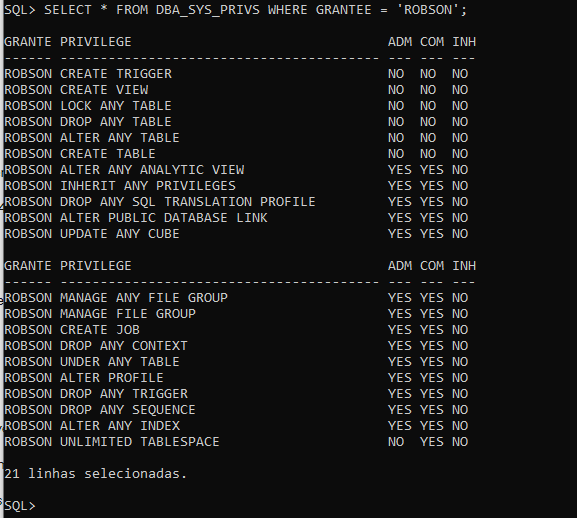

In [ ]:
-- Listar privilégios do usuário comun LOGADO
SELECT * FROM USER_SYS_PRIVS WHERE GRANTEE = 'NOME_DO_USUARIO';


In [ ]:
-- Listar privilégios de objeto concedidos a um usuário específico
SELECT * FROM DBA_TAB_PRIVS WHERE GRANTEE = 'NOME_DO_USUARIO';


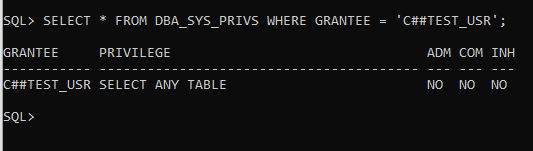

- Consultar Roles

In [ ]:
SELECT * FROM DBA_ROLE_PRIVS WHERE GRANTEE = 'NOME_DO_USUARIO';


- Salvar em arquivo a saída de uma query no terminal SQL*Plus do Oracle

1. **Abrir SQL*Plus**:

    Conecte-se ao SQL*Plus com seu usuário, senha e nome do serviço.

In [ ]:
username/password@serviço

2. **Iniciar o SPOOL**:

    Use o comando SPOOL para iniciar o redirecionamento da saída para um arquivo. Substitua **caminho/para/arquivo.txt** pelo caminho e nome do arquivo onde você deseja salvar a saída.

SPOOL caminho/para/arquivo.txt


3. **Executar seus Comandos**:

In [ ]:
SELECT * FROM DBA_SYS_PRIVS WHERE GRANTEE = 'NOME_DO_USUARIO';

4. **Feche o SPOOL**

In [ ]:
SPOOL OFF


-  listar todos os usuários no Oracle Database

In [ ]:
-- lista usuários com privilégios de administrador
SELECT username FROM dba_users;


In [ ]:
-- Lista todos os usuários visíveis para o usuário atual
SELECT username FROM all_users;


In [ ]:
-- Mostra apenas informações sobre o usuário atual.
SELECT username FROM user_users;


### REVOKE

o comando `REVOKE` é utilizado para remover permissões de acesso previamente concedidas aos usuários.

In [ ]:
REVOKE <ermissão> ON <objeto> FROM <NOME_DO_USUARIO>;


Exemplo:

In [ ]:
REVOKE SELECT, INSERT ON tabela_exemplo FROM usuario_exemplo;


### LOCK

### DENY